<a href="https://colab.research.google.com/github/RK22000/ICE-Iris_Classification_Experiment/blob/main/ICE_(Iris_Classification_Experiment).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ICE
Iris Classification Experiment is my midterm for my ML class.

Lets make this an interesting midterm by having fun with this experiment

## Data loading

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## Data exploration

In [5]:
sl, sw, pl, pw = zip(*iris.data)
features = [
    [sl, sw, pl, pw],
    iris.feature_names
]

In [6]:
side = 4

Text(0.5, 0.98, 'Range of feature values')

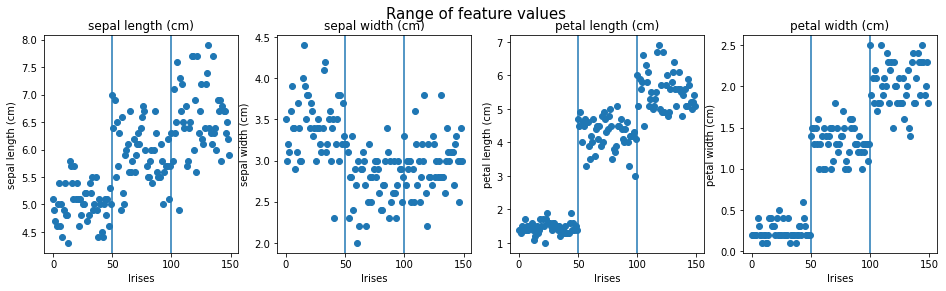

In [7]:
plt.figure(figsize=(side*4, side))
for i, (f, flab) in enumerate(zip(features[0], features[1])):
    plt.subplot(1, 4, i+1)
    plt.scatter(x=range(len(f)), y=f)
    plt.axvline(50)
    plt.axvline(100)
    plt.xlabel("Irises")
    plt.ylabel(flab)
    plt.title(flab)
plt.suptitle("Range of feature values", size=15)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


(0.0, 1.0, 0.0, 1.0)

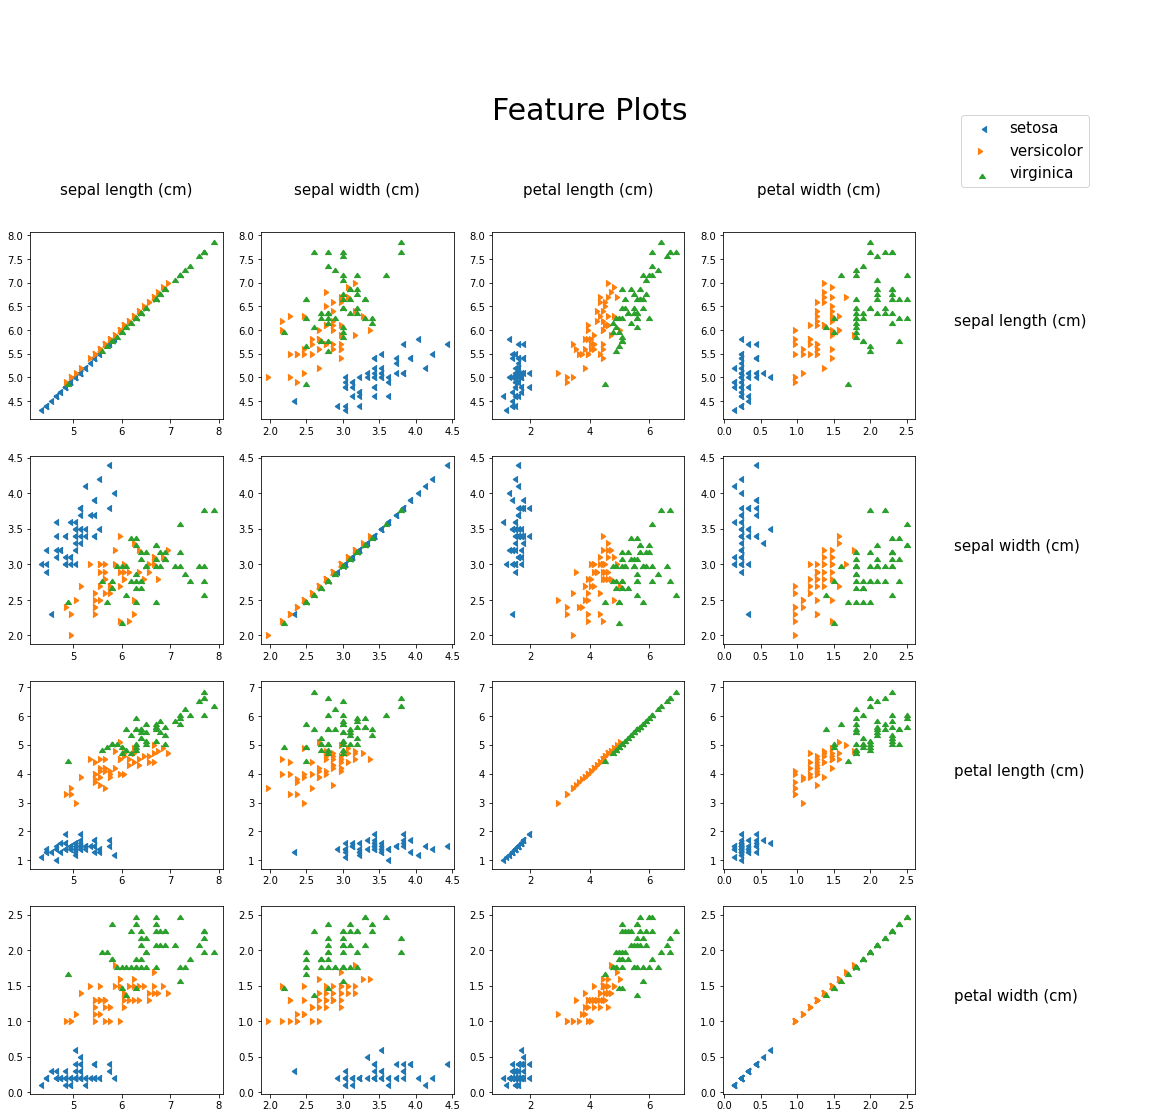

In [8]:
plt.figure(figsize=(5*side, 5*side))
#plt.suptitle("Feature Plots")
textx, texty = 0, 0.5
fontsize=15
for i, (y, ylab) in enumerate(zip(features[0], features[1])):
    plt.subplot(5, 5, 5 + i*5+5) 
    plt.axis("off")
    plt.text(textx, texty, ylab, fontsize=fontsize)
    for j, (x, xlab) in enumerate(zip(features[0], features[1])):
        plt.subplot(5, 5, 5 + i*5 + j+1)
        #plt.axis("off")
        plt.scatter(x=x[:50], y=y[:50], marker=4)
        plt.scatter(x=x[50:100], y=y[50:100], marker=5)
        plt.scatter(x=x[100:], y=y[100:], marker=6)
for i, (y, ylab) in enumerate(zip(features[0], features[1])):
    plt.subplot(5, 5, i+1)
    plt.axis("off")
    plt.text(0.5, 0, ylab, fontsize=fontsize, horizontalalignment='center')
plt.subplot(5, 5, 5)
plt.axis("off")
for i, spc in enumerate(iris.target_names):
    plt.scatter([], [], label=spc, marker=4+i)
plt.legend(loc='lower left', fontsize=fontsize)
plt.subplot(5, 5, 3)
plt.text(0, 0.4, "Feature Plots", fontsize=fontsize*2)
plt.axis("off")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


(0.0, 1.0, 0.0, 1.0)

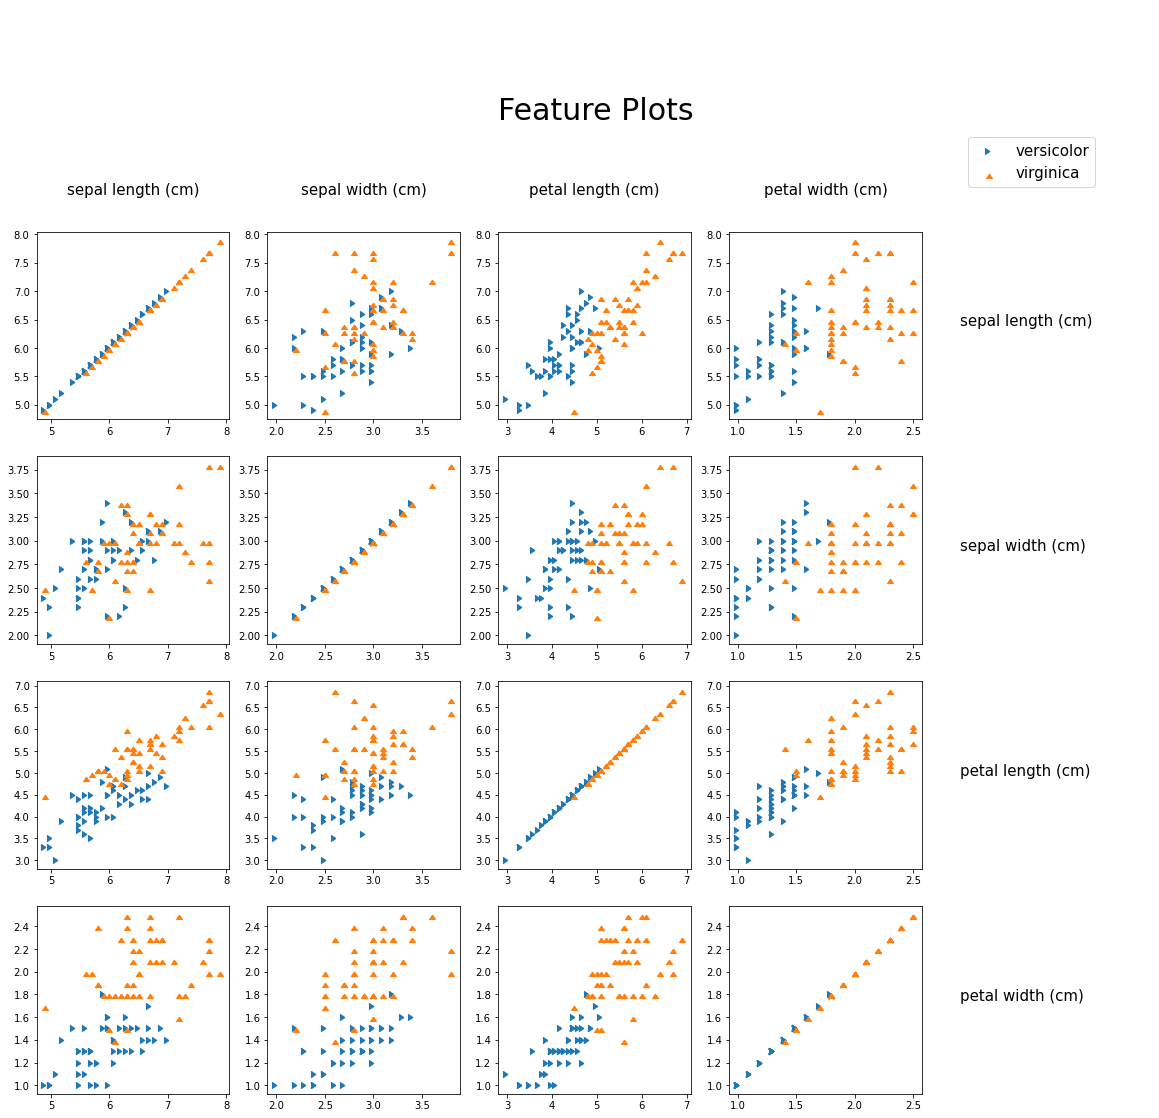

In [9]:
plt.figure(figsize=(5*side, 5*side))
#plt.suptitle("Feature Plots")
textx, texty = 0, 0.5
fontsize=15
for i, (y, ylab) in enumerate(zip(features[0], features[1])):
    plt.subplot(5, 5, 5 + i*5+5) 
    plt.axis("off")
    plt.text(textx, texty, ylab, fontsize=fontsize)
    for j, (x, xlab) in enumerate(zip(features[0], features[1])):
        plt.subplot(5, 5, 5 + i*5 + j+1)
        #plt.axis("off")
        #plt.scatter(x=x[:50], y=y[:50], marker=4)
        plt.scatter(x=x[50:100], y=y[50:100], marker=5)
        plt.scatter(x=x[100:], y=y[100:], marker=6)
for i, (y, ylab) in enumerate(zip(features[0], features[1])):
    plt.subplot(5, 5, i+1)
    plt.axis("off")
    plt.text(0.5, 0, ylab, fontsize=fontsize, horizontalalignment='center')
plt.subplot(5, 5, 5)
plt.axis("off")
for i, spc in enumerate(iris.target_names[1:]):
    plt.scatter([], [], label=spc, marker=5+i)
plt.legend(loc='lower left', fontsize=fontsize)
plt.subplot(5, 5, 3)
plt.text(0, 0.4, "Feature Plots", fontsize=fontsize*2)
plt.axis("off")

## Train Test set 

In [10]:
class Dset:
    def __init__(self, x, y):
        self.x = x
        self.y = y

In [52]:
import random
import numpy as np

np.random.seed(42)

# Try again with test set size 25 = 1/6 of total

# 25, 25, 25, 25, 25, 25
# Total size = 150
# Test size = 30
# Cross validation folds = 30, 30, [30], 30
# Samples from each class = 40
cross_val_folds = 4
train_size = 40 
train, test = Dset([],[]), Dset([],[])
for base in [0, 50, 100]:
    train_idx = set(np.random.choice(50, train_size, replace=False))
    for j in range(50):
        i = base+j
        x = iris.data[i]
        y = iris.target[i]
        dset = train if j in train_idx else test
        dset.x.append(x)
        dset.y.append(y)
plt_y_lim = (0.85, 1.02)
len(train.x), len(test.x), len(train.y), len(test.y)

(120, 30, 120, 30)

In [12]:
print(test.y)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


## Classification

### Crude SVC

import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
X = iris.data[50:]
y = iris.target[50:]
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X, y)

clf.predict(iris.data[95:105])

clf.score(iris.data[50:], iris.target[50:])

### Nearest neighbours

CV 0.95 accuracy with a standard deviation of 0.04
Test accuracy 0.97


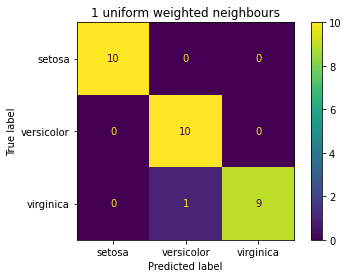

CV 0.95 accuracy with a standard deviation of 0.04
Test accuracy 0.97


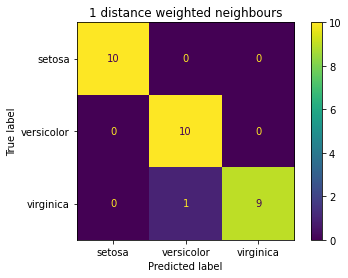

CV 0.96 accuracy with a standard deviation of 0.01
Test accuracy 1.00


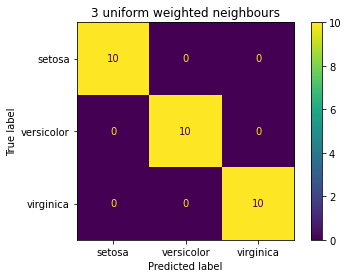

CV 0.96 accuracy with a standard deviation of 0.01
Test accuracy 1.00


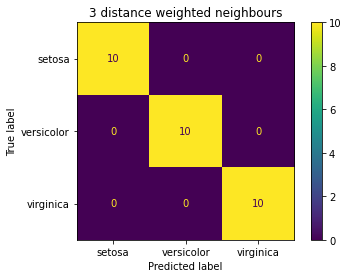

CV 0.97 accuracy with a standard deviation of 0.02
Test accuracy 1.00


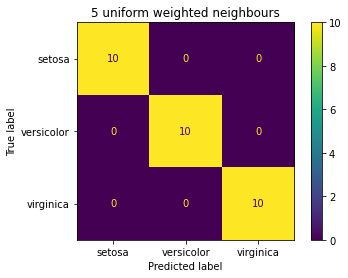

CV 0.97 accuracy with a standard deviation of 0.02
Test accuracy 1.00


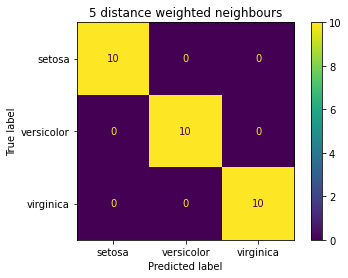

CV 0.94 accuracy with a standard deviation of 0.04
Test accuracy 0.97


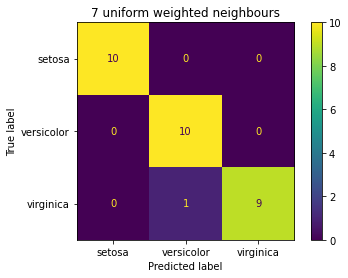

CV 0.95 accuracy with a standard deviation of 0.04
Test accuracy 0.97


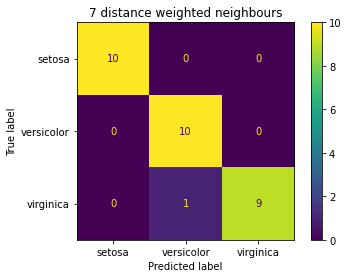

CV 0.95 accuracy with a standard deviation of 0.03
Test accuracy 1.00


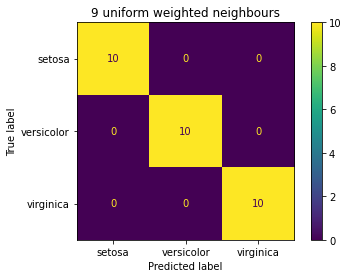

CV 0.96 accuracy with a standard deviation of 0.03
Test accuracy 1.00


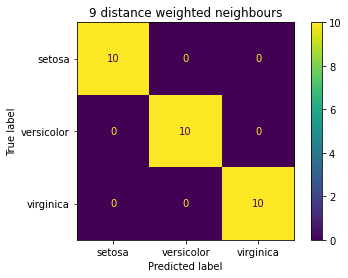

CV 0.96 accuracy with a standard deviation of 0.03
Test accuracy 0.97


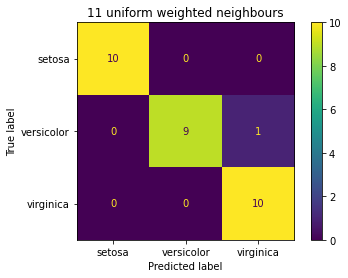

CV 0.97 accuracy with a standard deviation of 0.02
Test accuracy 1.00


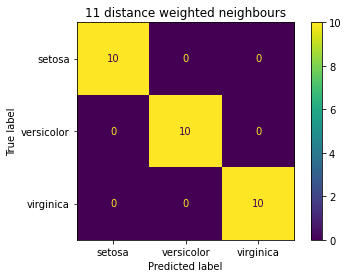

CV 0.96 accuracy with a standard deviation of 0.03
Test accuracy 0.97


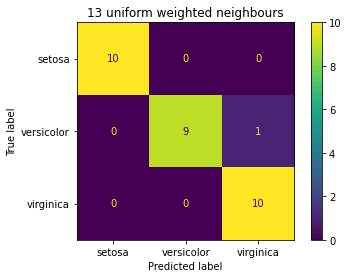

CV 0.97 accuracy with a standard deviation of 0.02
Test accuracy 0.97


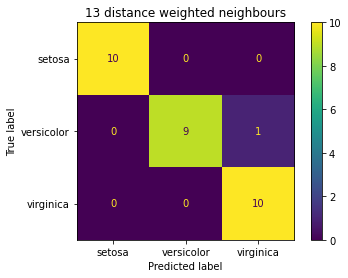

CV 0.97 accuracy with a standard deviation of 0.02
Test accuracy 0.97


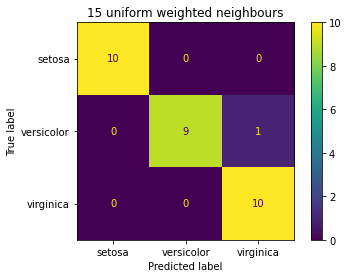

CV 0.97 accuracy with a standard deviation of 0.01
Test accuracy 0.97


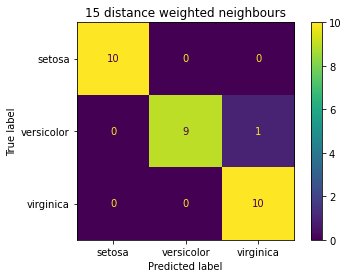

CV 0.97 accuracy with a standard deviation of 0.03
Test accuracy 0.97


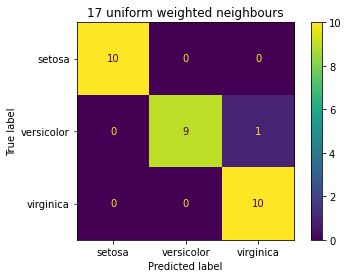

CV 0.97 accuracy with a standard deviation of 0.01
Test accuracy 0.97


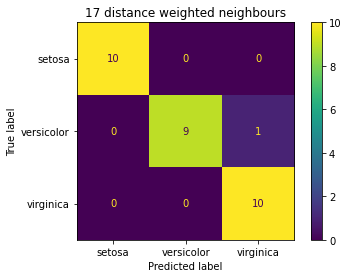

CV 0.96 accuracy with a standard deviation of 0.03
Test accuracy 0.97


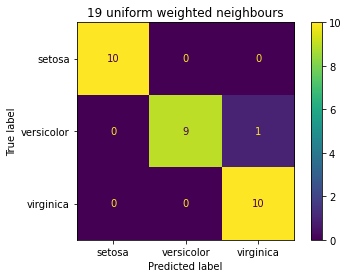

CV 0.97 accuracy with a standard deviation of 0.02
Test accuracy 0.97


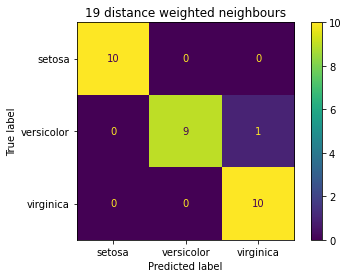

CV 0.93 accuracy with a standard deviation of 0.05
Test accuracy 0.93


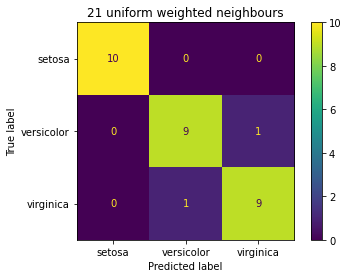

CV 0.95 accuracy with a standard deviation of 0.04
Test accuracy 0.93


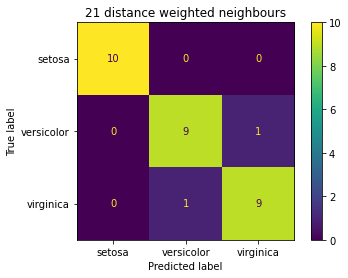

In [53]:
from sklearn import neighbors
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

n_neighbors = [2*i+1 for i in range(11)]
cvUniform, testUniform, cvDist, testDist = [], [], [], []
devUniform, devDist = [], []
for n in n_neighbors:
    for i, w in enumerate(["uniform", "distance"]):
        clf = neighbors.KNeighborsClassifier(n_neighbors=n, weights=w)
        scores = cross_val_score(clf, train.x, train.y, cv=cross_val_folds) # 135 = 3*3*3*5 = 9*15
        clf.fit(train.x, train.y)
        preds = clf.predict(test.x)
        ConfusionMatrixDisplay.from_predictions(
            y_true=test.y,
            y_pred=preds,
            labels=[0, 1, 2],
            display_labels=iris.target_names
        )
        ts_score = clf.score(test.x, test.y)
        #cm = confusion_matrix(y_true=test.y, y_pred=preds, labels=[0, 1, 2])
        #disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
        #disp.plot()
        #print(scores)
        cv, dev, ts = (cvUniform, devUniform, testUniform) if i==0 else (cvDist, devDist, testDist)
        cv.append(scores.mean())
        dev.append(scores.std())
        ts.append(ts_score)
        print("CV %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
        print("Test accuracy %0.2f" % ts_score)
        plt.title(f"{n} {w} weighted neighbours")
        plt.show()
None

Text(0.5, 1.0, 'CV and Test accuracies for Uniform and Distance weighted KNN')

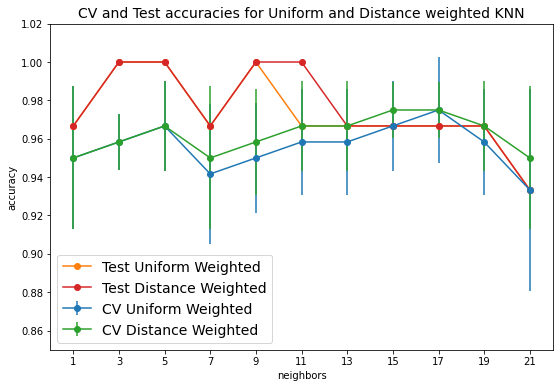

In [54]:
plt.figure(figsize=(9, 6))
for ls, dev, leg in zip(
    [cvUniform, testUniform, cvDist, testDist], 
    [devUniform, [], devDist, []],
    "CV Uniform Weighted, Test Uniform Weighted, CV Distance Weighted, Test Distance Weighted".split(", ")
    ):
    if len(dev) > 0:
        plt.errorbar(n_neighbors, ls, yerr=dev, fmt='o-', label=leg)
    else:
        plt.plot(n_neighbors, ls, 'o-', label=leg)
plt.legend(fontsize=14)
plt.xticks(ticks=n_neighbors)
plt.ylim(*plt_y_lim)
plt.xlabel("neighbors")
plt.ylabel("accuracy")
plt.title("CV and Test accuracies for Uniform and Distance weighted KNN", fontsize=14)

### Support Vector Classifier

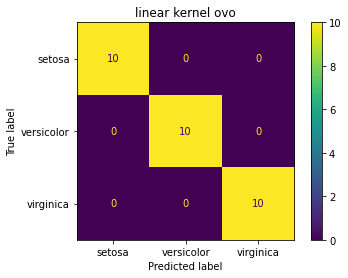

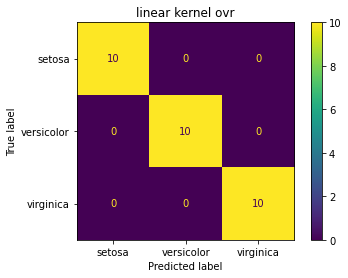

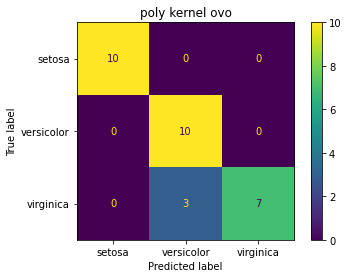

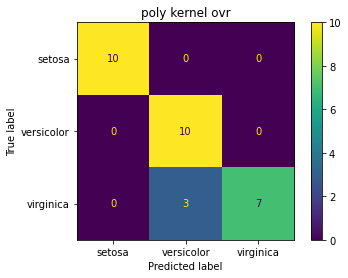

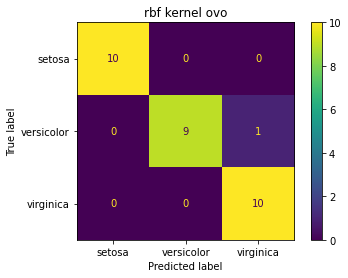

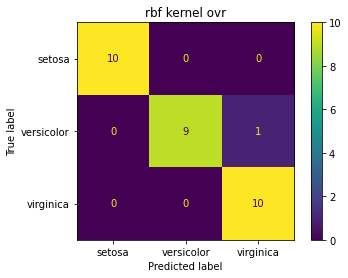

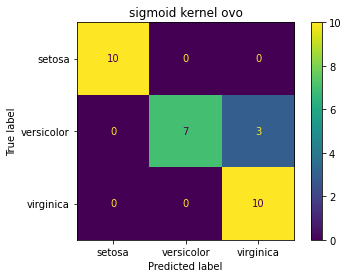

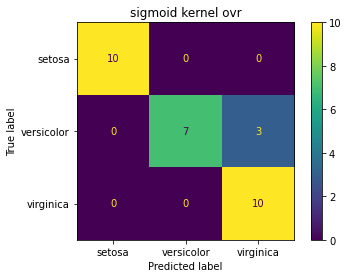

In [60]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
kernels = "linear, poly, rbf, sigmoid".split(", ")
dfunc_shape = ['ovo', 'ovr']
ts_acc = [[],[]]
cv_acc = [[],[]]
cv_err = [[], []]
for kernel in kernels:
    for i, shp in enumerate(dfunc_shape):
        clf = make_pipeline(
            StandardScaler(), 
            SVC(
                kernel=kernel, 
                decision_function_shape=shp
                )
            )
        cv_scores = cross_val_score(clf, train.x, train.y, cv=cross_val_folds)
        clf.fit(train.x, train.y)
        ts_score = clf.score(test.x, test.y)
        ts_acc[i].append(ts_score)
        cv_acc[i].append(cv_scores.mean())
        cv_err[i].append(cv_scores.std())
        ConfusionMatrixDisplay.from_estimator(
            estimator=clf,
            X=test.x,
            y=test.y,
            labels=[0, 1, 2],
            display_labels=iris.target_names
        )
        plt.title(f"{kernel} kernel {shp}")
plt.show()

Text(0.5, 1.0, 'CV and Test accuracies for SVC')

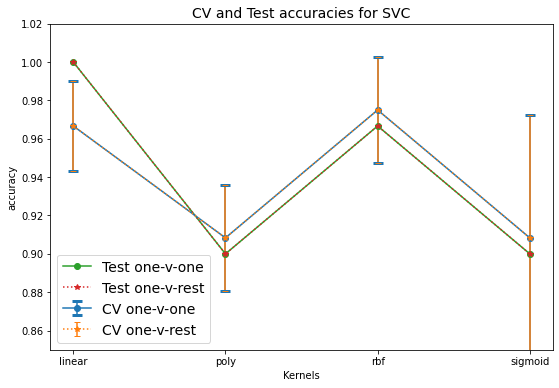

In [61]:
plt.figure(figsize=(9, 6))
for ls, dev, leg in zip(
    [*cv_acc, *ts_acc], 
    [*cv_err, [], []],
    "CV one-v-one, CV one-v-rest, Test one-v-one, Test one-v-rest".split(", ")
    ):
    fmt, capsize, capth = ('o-', 5, 3) if leg[-1]=='e' else ('*:', 3, 1)
    if len(dev) > 0:
        plt.errorbar([i for i, _ in enumerate(ls)], ls, yerr=dev, fmt=fmt, label=leg, capsize=capsize, capthick=capth)
    else:
        plt.plot([i for i, _ in enumerate(ls)], ls, fmt, label=leg)
plt.legend(fontsize=14)
plt.xticks(*zip(*enumerate(kernels)))
plt.ylim(*plt_y_lim)
plt.xlabel("Kernels")
plt.ylabel("accuracy")
plt.title("CV and Test accuracies for SVC", fontsize=14)

### Decission Tree Classifier

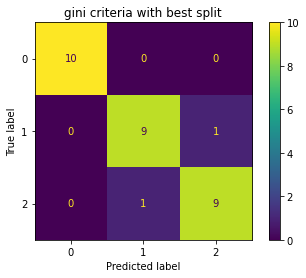

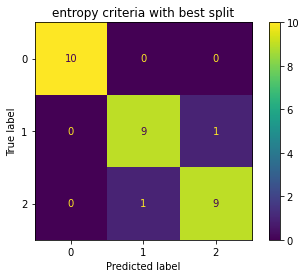

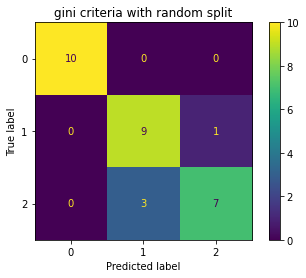

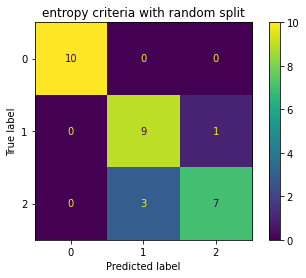

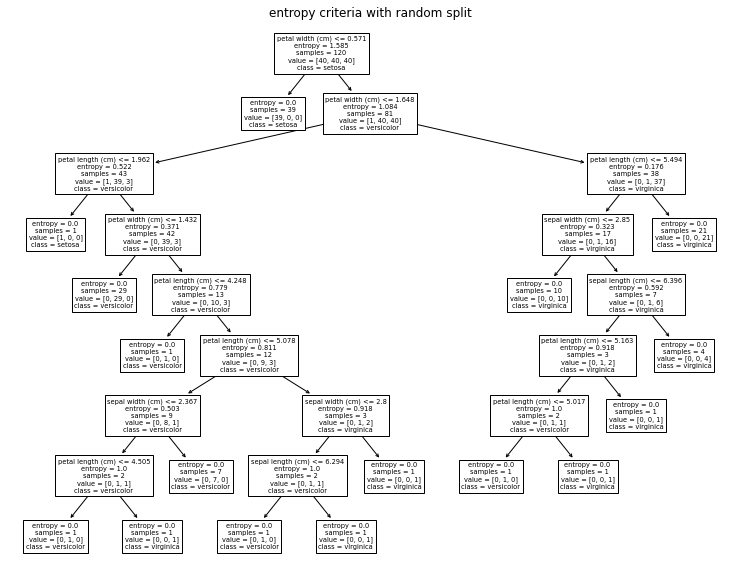

In [62]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

# criterion{“gini”, “entropy”, “log_loss”}, 
# splitter{“best”, “random”}
crit = "gini, entropy".split(", ")
splt = "best, random".split(", ")
best_cv_clf = None
best_cv_acc = 0
title = ""
ts_acc = [[],[]]
cv_acc = [[],[]]
cv_dev = [[], []]

for sp in splt:
    for i, cri in enumerate(crit):
        clf = tree.DecisionTreeClassifier(random_state=42, criterion=cri, splitter=sp)
        cv_score = cross_val_score(clf, train.x, train.y)
        cv_acc[i].append(cv_score.mean())
        cv_dev[i].append(cv_score.std())
        clf = clf.fit(train.x, train.y)
        ConfusionMatrixDisplay.from_estimator(clf, test.x, test.y)
        plt.title(f"{cri} criteria with {sp} split")
        plt.show()
        ts_score = clf.score(test.x, test.y)
        ts_acc[i].append(ts_score)
        if cv_score.mean() > best_cv_acc: 
            best_cv_clf = clf
            title = f"{cri} criteria with {sp} split"

plt.figure(figsize=(13, 10))
tree.plot_tree(best_cv_clf, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title(title)
None

needed depth of 8

Text(0.5, 1.0, 'CV and Test accuracies for Decission trees')

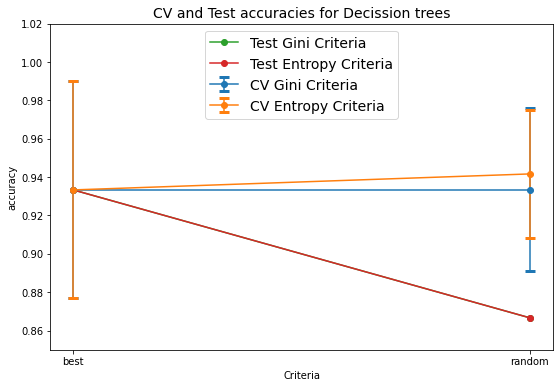

In [64]:
plt.figure(figsize=(9, 6))
for ls, dev, leg in zip(
    [*cv_acc, *ts_acc], 
    [*cv_dev, [], []],
    "CV Gini Criteria, CV Entropy Criteria, Test Gini Criteria, Test Entropy Criteria".split(", ")
    ):
    fmt, capsize, capth = ('o-', 5, 3)# if leg[-1]=='e' else ('*:', 3, 1)
    if len(dev) > 0:
        plt.errorbar([i for i, _ in enumerate(ls)], ls, yerr=dev, fmt=fmt, label=leg, capsize=capsize, capthick=capth)
    else:
        plt.plot([i for i, _ in enumerate(ls)], ls, fmt, label=leg)
plt.legend(fontsize=14)
plt.xticks(*zip(*enumerate(splt)))
plt.ylim(*plt_y_lim)
plt.xlabel("Criteria")
plt.ylabel("accuracy")
plt.title("CV and Test accuracies for Decission trees", fontsize=14)

This is over fitting
Will a random forrest also overfit?
*   List item
*   List item



In [19]:
[cv_score.mean(), ts_score]

[0.9416666666666667, 0.8666666666666667]

In [20]:
iris.feature_names, iris.target_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

### Random Forest

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/confusion_matrix.py:125: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


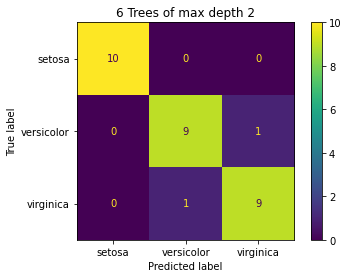

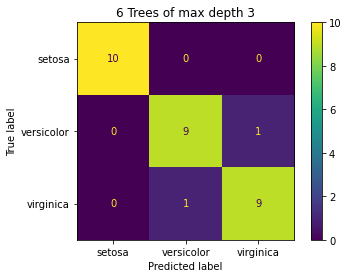

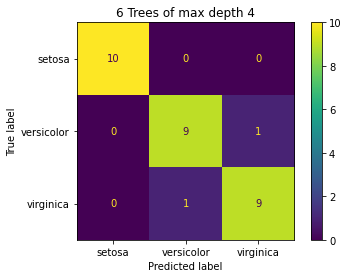

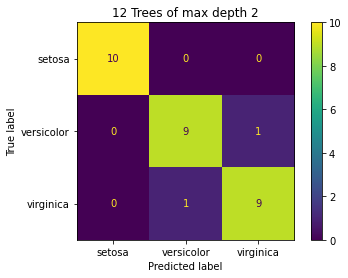

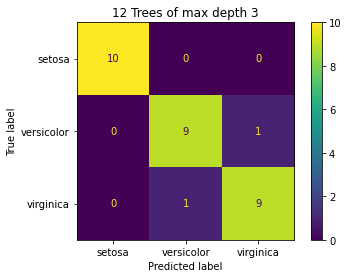

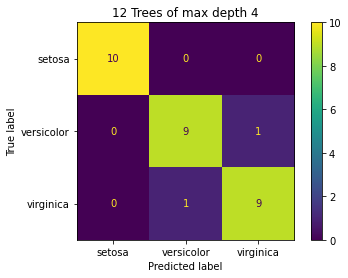

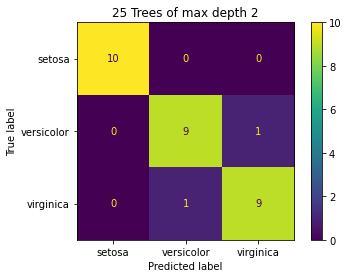

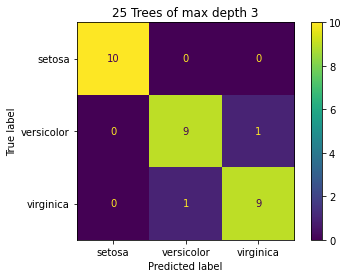

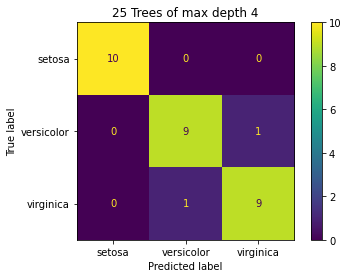

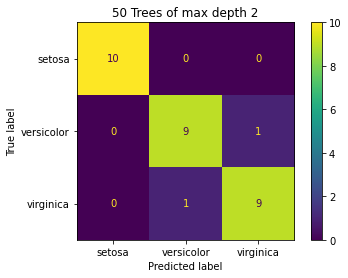

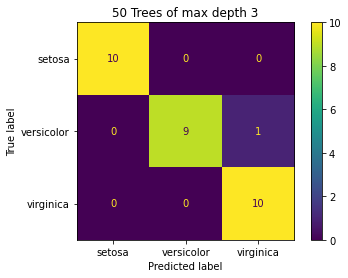

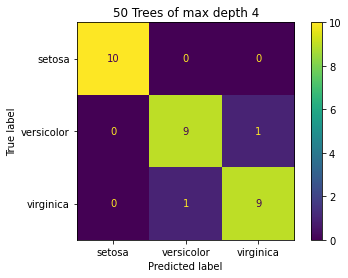

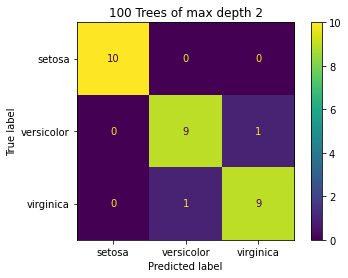

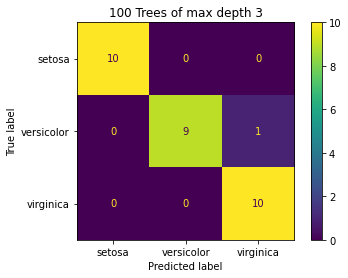

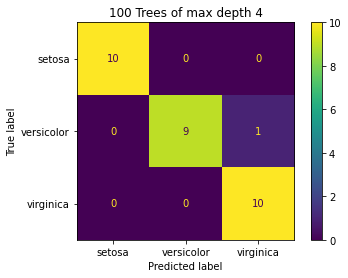

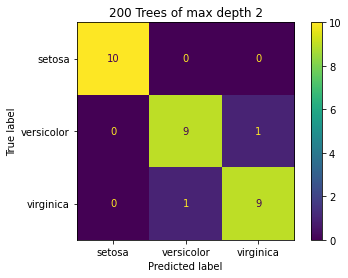

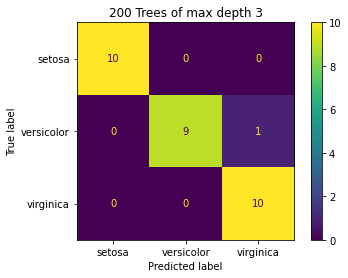

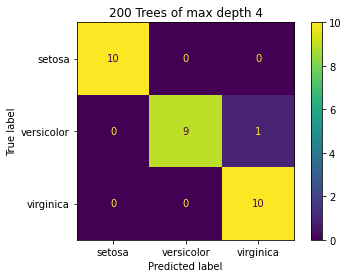

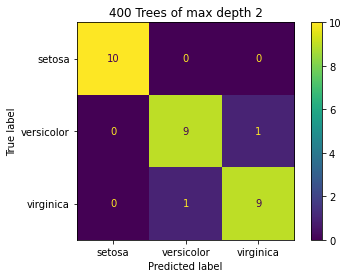

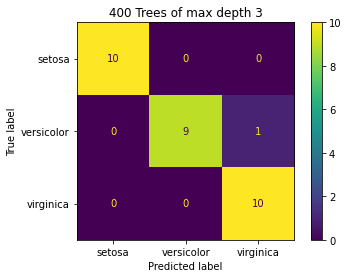

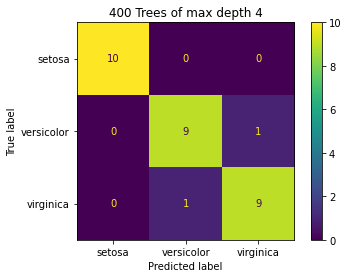

In [67]:
from sklearn.ensemble import RandomForestClassifier

dpts = [2, 3, 4]
n_esti = [6, 12, 25, 50, 100, 200, 400]
ts_acc = [[],[],[]]
cv_acc = [[],[],[]]
cv_dev = [[],[],[]]

for n in n_esti:
    for i, dpt in enumerate(dpts):
        clf = RandomForestClassifier(n_estimators=n, max_depth=dpt, criterion='entropy', random_state=42)
        cv_scores = cross_val_score(clf, train.x, train.y, cv=cross_val_folds)
        clf.fit(train.x, train.y)
        ts_score = clf.score(test.x, test.y)
        ts_acc[i].append(ts_score)
        cv_acc[i].append(cv_scores.mean())
        cv_dev[i].append(cv_scores.std())
        ConfusionMatrixDisplay.from_estimator(
            estimator=clf,
            X=test.x,
            y=test.y,
            labels=[0, 1, 2],
            display_labels=iris.target_names
        )
        plt.title(f"{n} Trees of max depth {dpt}")
plt.show()

Text(0.5, 1.0, 'CV and Test accuracies for random forrests')

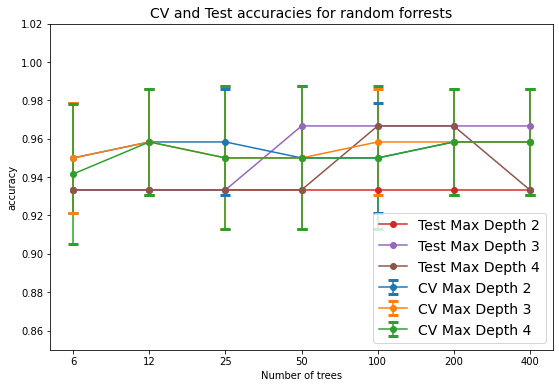

In [69]:
plt.figure(figsize=(9, 6))
for ls, dev, leg in zip(
    [*cv_acc, *ts_acc], 
    [*cv_dev, [], [], []],
    "CV Max Depth 2, CV Max Depth 3, CV Max Depth 4, Test Max Depth 2, Test Max Depth 3, Test Max Depth 4".split(", ")
    ):
    fmt, capsize, capth = ('o-', 5, 3)# if leg[-1]=='e' else ('*:', 3, 1)
    if len(dev) > 0:
        plt.errorbar([i for i, _ in enumerate(ls)], ls, yerr=dev, fmt=fmt, label=leg, capsize=capsize, capthick=capth)
    else:
        plt.plot([i for i, _ in enumerate(ls)], ls, fmt, label=leg)
plt.legend(fontsize=14)
plt.xticks(*zip(*enumerate(n_esti)))
plt.ylim(plt_y_lim)
plt.xlabel("Number of trees")
plt.ylabel("accuracy")
plt.title("CV and Test accuracies for random forrests", fontsize=14)

### Stack

[('knn', KNeighborsClassifier()), ('svc', Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear'))])), ('tree', DecisionTreeClassifier(criterion='entropy', random_state=42)), ('rfc', RandomForestClassifier(criterion='entropy', max_depth=3, random_state=42))]


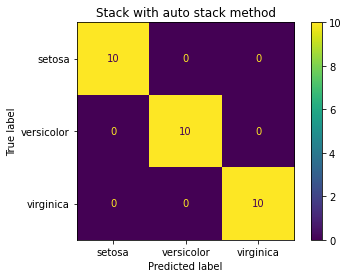

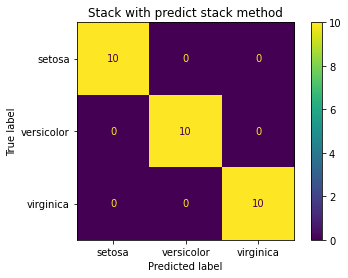

In [73]:
from sklearn.ensemble import StackingClassifier

from sklearn.ensemble import RandomForestClassifier

st_met = "auto, predict".split(", ")
ts_acc = []
cv_acc = []
cv_dev = []

estimators= [
    ('knn',neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')),
    ('svc', make_pipeline(
        StandardScaler(), 
        SVC(
            kernel='linear', 
            decision_function_shape='ovr'
            )
    )),
    ('tree',tree.DecisionTreeClassifier(random_state=42, criterion='entropy', splitter='best')),
    ('rfc',RandomForestClassifier(n_estimators=100, max_depth=3, criterion='entropy', random_state=42))
]
print([i for i in estimators])

for i, met in enumerate(st_met):
    clf = StackingClassifier(
        estimators=estimators,
        stack_method=met
    )
    cv_scores = cross_val_score(clf, train.x, train.y, cv=cross_val_folds)
    clf.fit(train.x, train.y)
    ts_score = clf.score(test.x, test.y)
    ts_acc.append(ts_score)
    cv_acc.append(cv_scores.mean())
    cv_dev.append(cv_scores.std())
    ConfusionMatrixDisplay.from_estimator(
        estimator=clf,
        X=test.x,
        y=test.y,
        labels=[0, 1, 2],
        display_labels=iris.target_names
    )
    plt.title(f"Stack with {met} stack method")
plt.show()

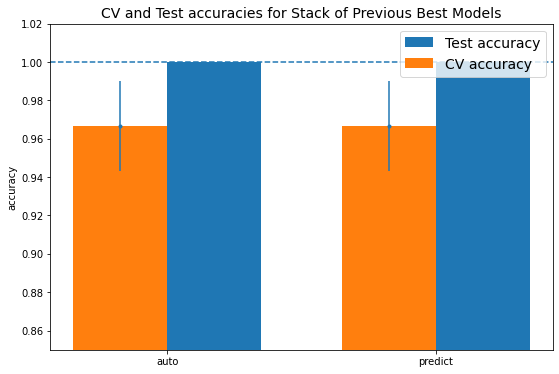

In [84]:
plt.figure(figsize=(9, 6))

width = 0.35

x = np.arange(len(ts_acc))

# Test acc
plt.bar(x+width/2, ts_acc, width, label='Test accuracy')
plt.bar(x-width/2, cv_acc, width=width, label='CV accuracy')
plt.errorbar(x-width/2, cv_acc, yerr=cv_dev, fmt=".")
plt.xticks(*zip(*enumerate("auto, predict".split(", "))))
plt.legend(fontsize=14)
plt.ylim(plt_y_lim)
plt.ylabel("accuracy")
plt.title("CV and Test accuracies for Stack of Previous Best Models", fontsize=14)
plt.axhline(1, linestyle='--')